## Ejercicios API Frankfurter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import requests

from pprint import pprint

### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

In [2]:
def plot_evolucion_moneda(currency, year):
    
    url = "https://api.frankfurter.app"

    date = f"{year}-01-01"
    
    if year != datetime.now().year:
        
        date_ = f"{year}-12-31"
        
        endpoint = f"{url}/{date}..{date_}?to={currency}"
        
    else:
        
        endpoint = f"{url}/{date}..?to={currency}"

    print(f"Endpoint: {endpoint}")

    response = requests.get(endpoint)

    data = response.json()
    
    fechas = list(data["rates"].keys())

    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
    
    moneda = [data["rates"][fecha][currency] for fecha in data["rates"].keys()]
    
    # Tamaño de la figura
    plt.figure(figsize = (18, 10))

    # Plot (función especial que trabaja con fechas)
    plt.plot_date(x = fechas, y = moneda, fmt = "-")

    plt.plot(fechas[np.argmax(moneda)], np.max(moneda), color = "green", marker = "o", markersize = 12) # max
    plt.plot(fechas[np.argmin(moneda)], np.min(moneda), color = "red", marker = "o", markersize = 12) # min

    # Evita que se sobrepongan las fechas
    plt.gcf().autofmt_xdate()

    # Etiquetas
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(f"{currency}", fontsize = 20)
    plt.title(f"Relación EUR - {currency} {year}", fontsize = 20)

    plt.grid()
    plt.show()

Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?to=GBP


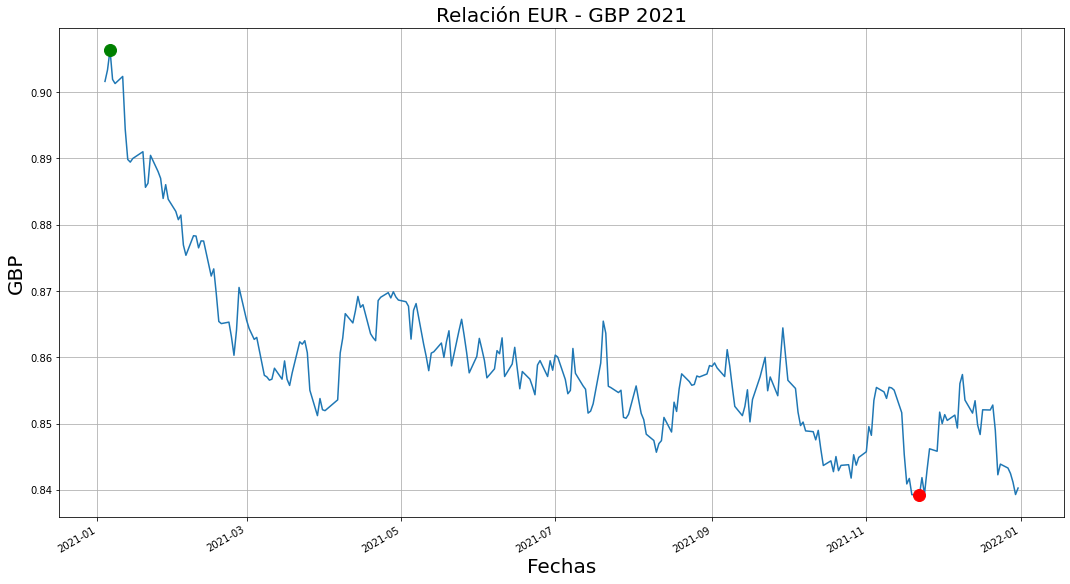

In [3]:
plot_evolucion_moneda("GBP", 2021)

Endpoint: https://api.frankfurter.app/2022-01-01..2022-12-31?to=USD


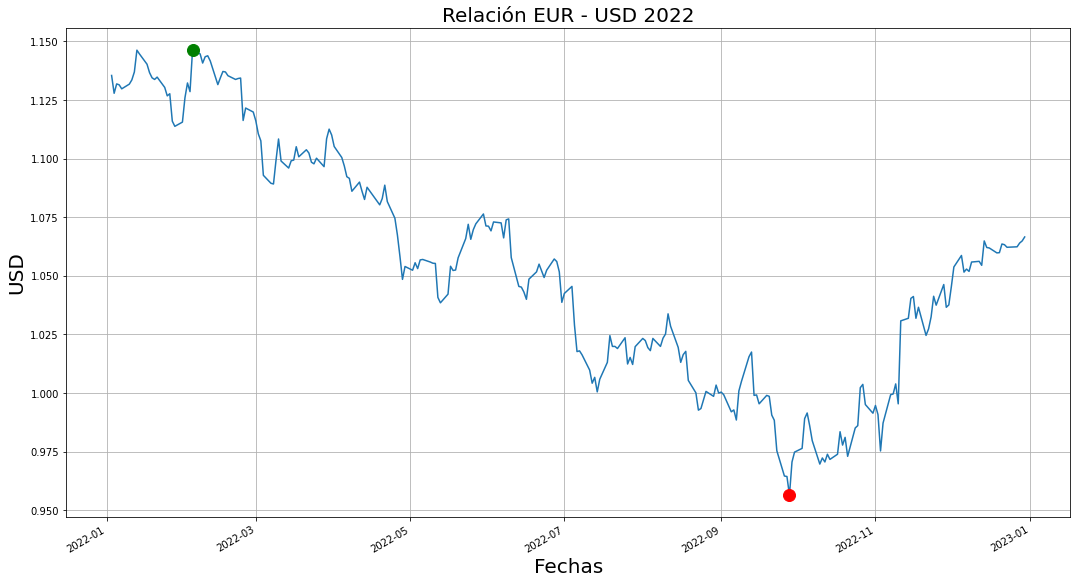

In [4]:
plot_evolucion_moneda("USD", 2022)

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

In [5]:
def plot_evolucion_monedas(currencies, year):
    
    url = "https://api.frankfurter.app"

    date = f"{year}-01-01"
    
    todas_fechas, todas_monedas = list(), list()
    
    for currency in currencies:
        
        if year != datetime.now().year:
        
            date_ = f"{year}-12-31"

            endpoint = f"{url}/{date}..{date_}?to={currency}"

        else:

            endpoint = f"{url}/{date}..?to={currency}"

        print(f"Endpoint: {endpoint}")

        response = requests.get(endpoint)

        data = response.json()

        fechas = list(data["rates"].keys())

        fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]

        todas_fechas.append(fechas)

        moneda = [data["rates"][fecha][currency] for fecha in data["rates"].keys()]

        todas_monedas.append(moneda)
    
    # Tamaño de la figura
    plt.figure(figsize = (18, 10))

    # Plot (función especial que trabaja con fechas)
    for fecha, moneda, currency in zip(todas_fechas, todas_monedas, currencies):
        plt.plot_date(x = fecha, y = moneda, fmt = "-", label = currency)

    # Evita que se sobrepongan las fechas
    plt.gcf().autofmt_xdate()

    # Etiquetas
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(" - ".join(currencies).strip(), fontsize = 20)
    plt.title(f"Relación EUR - {' - '.join(currencies).strip()} {year}", fontsize = 20)
    plt.legend()

    plt.grid()
    plt.show()

Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?to=USD
Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?to=GBP
Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?to=CAD


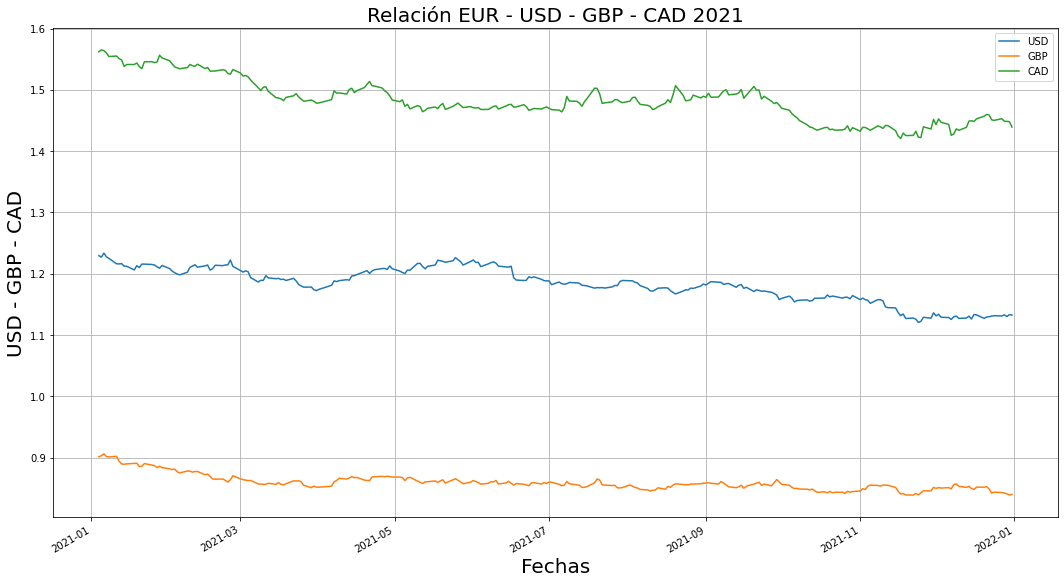

In [6]:
year = 2021
currencies = ["USD", "GBP", "CAD"]
plot_evolucion_monedas(currencies, year)

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.

In [7]:
def plot_evolucion_currency(from_currency, to_currency, year):

    url = "https://api.frankfurter.app"

    amount = 1
    
    date = f"{year}-01-01"
    
    if year != datetime.now().year:
        
        date_ = f"{year}-12-31"

        endpoint = f"{url}/{date}..{date_}?amount={amount}&from={from_currency}&to={to_currency}"

    else:

        endpoint = f"{url}/{date}..?amount={amount}&from={from_currency}&to={to_currency}"

    print(f"Endpoint: {endpoint}")

    response = requests.get(endpoint)
    
    data = response.json()
    
    fechas = list(data["rates"].keys())

    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
    
    moneda = [data["rates"][fecha][to_currency] for fecha in data["rates"].keys()]
    
    # Tamaño de la figura
    plt.figure(figsize = (18, 10))

    # Plot (función especial que trabaja con fechas)
    plt.plot_date(x = fechas, y = moneda, fmt = "-")

    plt.plot(fechas[np.argmax(moneda)], np.max(moneda), color = "green", marker = "o", markersize = 12) # max
    plt.plot(fechas[np.argmin(moneda)], np.min(moneda), color = "red", marker = "o", markersize = 12) # min

    # Evita que se sobrepongan las fechas
    plt.gcf().autofmt_xdate()

    # Etiquetas
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(f"{to_currency}", fontsize = 20)
    plt.title(f"Relación {from_currency} - {to_currency} {year}", fontsize = 20)

    plt.grid()
    plt.show()

Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?amount=1&from=USD&to=GBP


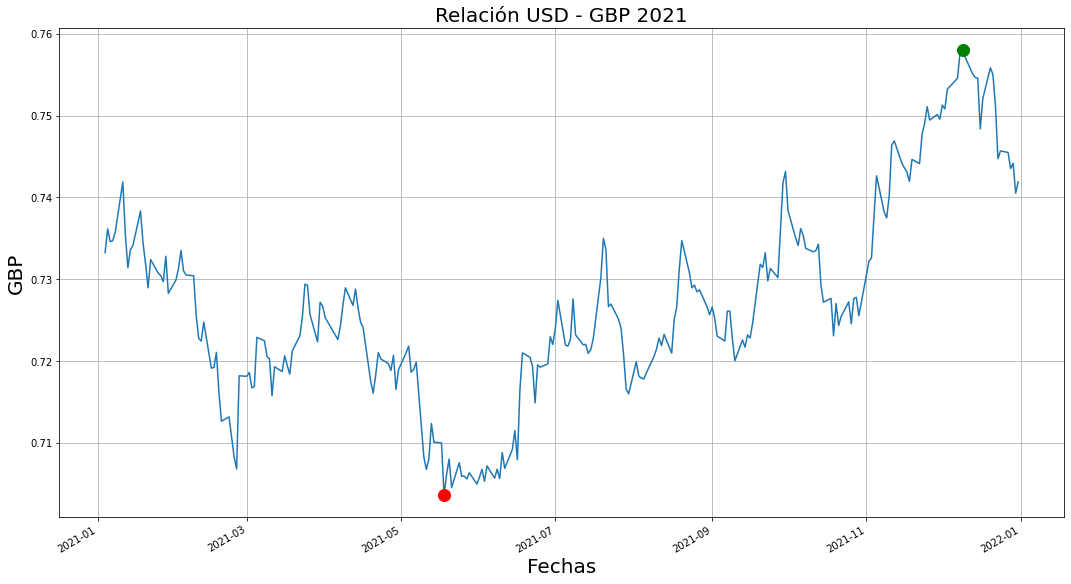

In [8]:
plot_evolucion_currency("USD", "GBP", 2021)

Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?amount=1&from=GBP&to=USD


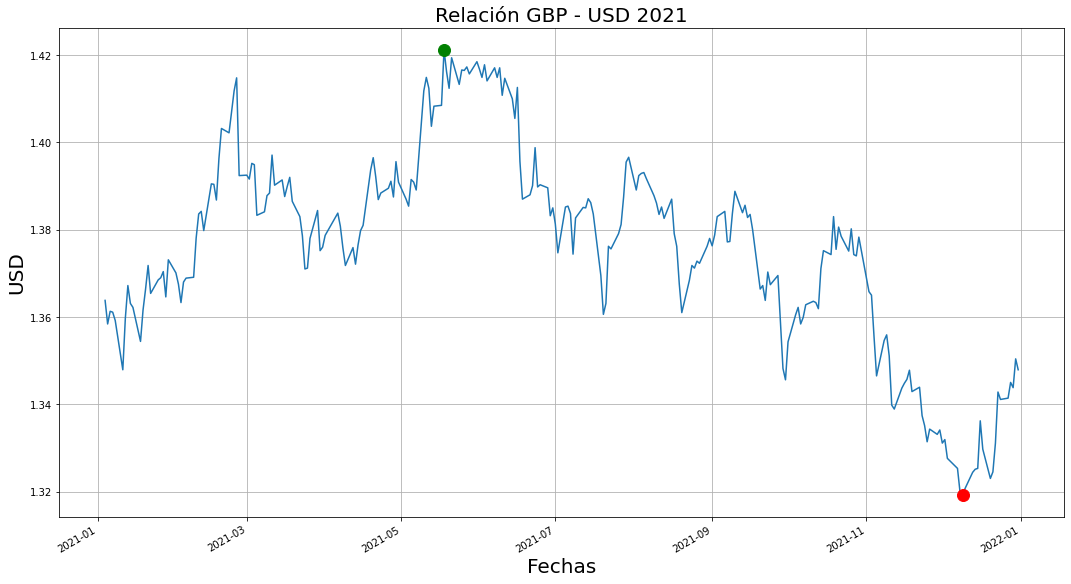

In [9]:
plot_evolucion_currency("GBP", "USD", 2021)

In [10]:
################################################################################################################################